In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer




In [ ]:
df=pd.read_csv('medical_cost.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Maneras de filtrar
- mayores_edad = df[df['age'] >= 18]
- resultado = df.query('age > 18 and city == "Madrid"')
- f.loc[df['age'] > 30, ['name', 'email']]
- df_mask = df.where(df['age'] > 18)

In [ ]:
Z=1.5
z_score=abs((df['age']-df['age'].mean())/df['age'].std())

outliers=df['age'][z_score>Z]
outliers

,age
1,18
11,62
22,18
26,63
31,18
...,...
1322,62
1325,61
1334,18
1335,18


In [ ]:
Z=1.5
z_score=abs((df['bmi']-df['bmi'].mean())/df['bmi'].std())
outliers=df['bmi'][z_score>Z]
print(f"bmi outliers: {(len(outliers)/df['bmi'].count())*100:.2f}%")

bmi outliers: 13.00%


In [ ]:
mediana=df['age'].median()
df.loc[z_score>Z,'age']=mediana

In [ ]:
X=df.drop(columns=['charges'])
y=df['charges']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=588,test_size=0.2)

In [ ]:
one=OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first')


#transformador=make_column_transformer((one,X_train.select_dtypes(include='object').columns),remainder='passthrough')

col_cat=['sex','smoker','region']
X_train_cod=one.fit_transform(X_train[col_cat])
X_test_cod=one.transform(X_test[col_cat])

In [ ]:
X_train['sex']=X_train_cod[:,0]
X_train['smoker']=X_train_cod[:,1]
X_train['region']=X_train_cod[:,2]

X_test['sex']=X_test_cod[:,0]
X_test['smoker']=X_test_cod[:,1]
X_test['region']=X_test_cod[:,2]

In [ ]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
model=Sequential([
    Input(shape=(X_train_cod.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,169 (12.38 KB)

 Trainable params: 3,169 (12.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
history=model.fit(X_train_cod,y_train,epochs=60,batch_size=32,validation_split=0.2,callbacks=[es])

Epoch 1/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 317831040.0000 - mae: 13227.2158 - val_loss: 295453088.0000 - val_mae: 12480.3467
Epoch 2/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 303565408.0000 - mae: 12987.9512 - val_loss: 295193408.0000 - val_mae: 12470.9785
Epoch 3/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 294916160.0000 - mae: 12693.5020 - val_loss: 293959136.0000 - val_mae: 12427.1904
Epoch 4/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 327815712.0000 - mae: 13374.2451 - val_loss: 289053056.0000 - val_mae: 12253.5762
Epoch 5/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 321853600.0000 - mae: 13312.5410 - val_loss: 273149664.0000 - val_mae: 11674.3223
Epoch 6/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 287775648.0000 - mae: 12356.7236 - val_loss: 232686928.0000 - val_mae: 10184.9600
Epoch 7/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 252971184.0000 - mae: 10887.2588 - val_loss: 163942512.0000 - val_mae: 8061.6182
Epoch 8/60
27/2

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61549760.0000 - mae: 5951.9497 


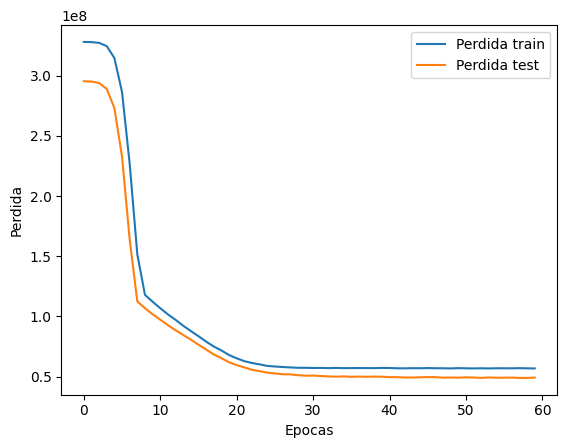

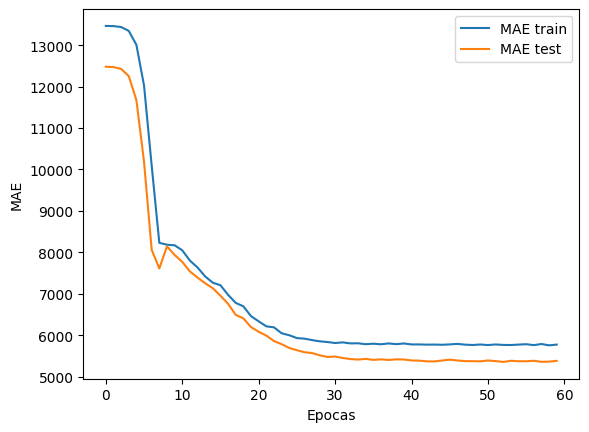

In [ ]:
loss, mae=model.evaluate(X_test_cod,y_test)

plt.plot(history.history['loss'],label='Perdida train')
plt.plot(history.history['val_loss'],label='Perdida test')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend()
plt.show()



plt.plot(history.history['mae'],label='MAE train')
plt.plot(history.history['val_mae'],label='MAE test')
plt.legend()
plt.ylabel('MAE')
plt.xlabel('Epocas')
plt.show()

In [ ]:
res=mae/y_train.mean()
res

np.float64(0.44056244929801)